In [2]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163764 sha256=2295db30e6523a98f8acc4270869fb36b8570bcac98b9da7cfe3dc7f91d797c1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [23]:
from surprise import Dataset
import pandas as pd
data = Dataset.load_builtin('ml-100k')
data=pd.DataFrame(data.__dict__['raw_ratings'], columns=['user_id','item_id','rating','timestamp'])
data.to_csv('save.csv')

# Завантаження даних та визначення читача

In [24]:

data = pd.read_csv('save.csv')
reader = Reader(rating_scale=(1, 5))

# Створення датасету Surprise

In [25]:
data_surprise = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)

In [26]:
param_grid = {'n_epochs': [5, 10, 15],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.4, 0.6, 0.8]}

In [27]:
grid_search = GridSearchCV(SVD, param_grid, measures=['RMSE'], cv=5)
grid_search.fit(data_surprise)

# Порівняння інших алгоритмів (SVD++, NMF)

In [32]:
models = [SVD(), SVDpp(), NMF()]
results = []
for model in models:
    scores = cross_validate(model, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    print(f"Algorithm: {model.__class__.__name__}")
    print(f"Mean RMSE: {sum(scores['test_rmse']) / len(scores['test_rmse'])}")
    print(f"Mean MAE: {sum(scores['test_mae']) / len(scores['test_mae'])}")
    print("\n")
    mean_rmse = sum(scores['test_rmse']) / len(scores['test_rmse'])
    mean_mae = sum(scores['test_mae']) / len(scores['test_mae'])
    results.append({'Algorithm': model.__class__.__name__, 'Mean RMSE': mean_rmse, 'Mean MAE': mean_mae})


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9399  0.9370  0.9345  0.9435  0.9340  0.9378  0.0036  
MAE (testset)     0.7398  0.7405  0.7351  0.7452  0.7356  0.7392  0.0037  
Fit time          1.38    1.54    2.19    1.84    1.37    1.66    0.31    
Test time         0.22    0.13    0.19    0.21    0.20    0.19    0.03    
Algorithm: SVD
Mean RMSE: 0.9377622225464599
Mean MAE: 0.7392459149313865


Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9174  0.9247  0.9174  0.9246  0.9167  0.9201  0.0037  
MAE (testset)     0.7180  0.7266  0.7194  0.7223  0.7221  0.7217  0.0030  
Fit time          27.11   27.03   26.87   26.97   27.02   27.00   0.08    
Test time         4.44    5.46    4.33    4.80    4.90    4.79    0.40    
Algorithm: SVDpp
Mean RMSE: 0.9201350039711581
Mean MAE: 0.72168

# Виведення результатів

In [37]:

results_df = pd.DataFrame(results)
print(results_df)

  Algorithm  Mean RMSE  Mean MAE
0       SVD   0.937762  0.739246
1     SVDpp   0.920135  0.721689
2       NMF   0.963340  0.757859


# Візуалізація результатів

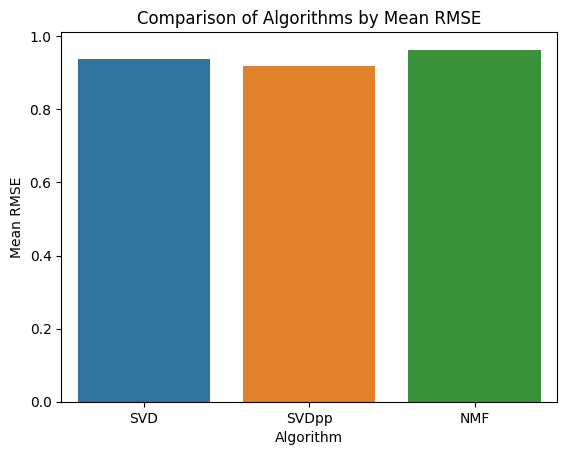

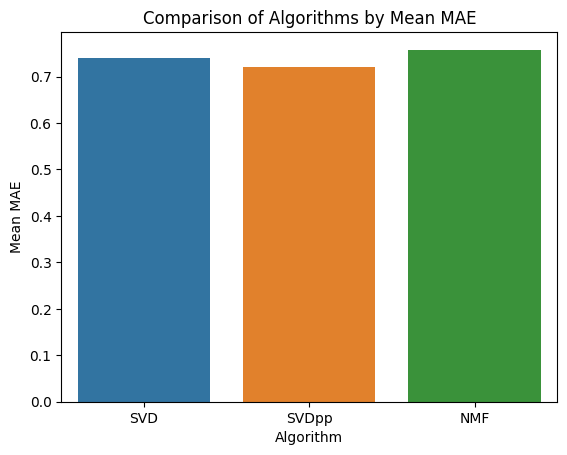

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Algorithm', y='Mean RMSE', data=results_df)
plt.title('Comparison of Algorithms by Mean RMSE')
plt.show()

sns.barplot(x='Algorithm', y='Mean MAE', data=results_df)
plt.title('Comparison of Algorithms by Mean MAE')
plt.show()